# TP 2 Matias Gathoye avec l'année 1898

## Partie Keyword

### Préparation de l'extraction

In [ ]:
import os
import yake

# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

### Choix de l'année et sélection des fichiers

In [ ]:
# Choisir une année
year = 1898

# Lister les Fichiers
txt_path = '../data/txt'
files = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]

### Extraction des keywords de tous les fichiers 
(attention, pour 100 fichiers c'est long. Je ne l'ai pas fait mais j'ai vu que ça fonctionnait)

In [ ]:
for f in sorted(files):
    text = open(os.path.join(txt_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

## Partie Wordcloud
Il y a des lignes qui seront répétées par rapport au code-ci dessus, comme la déclaration de l'année par exemple. Je les laisse au cas où vous commencez à lancer le code à partir du point 2. Ce sera pareil pour les points suivants.

### Imports et stopwords

In [9]:
from collections import Counter
from wordcloud import WordCloud
import os  
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/matias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]

# liste perso en plus
sw += ["où", "apparemment", "décidément", "déjà", "alors", "toutes", "leurs", "avant", "celui", "toute", "elles",
       "dés", "très", "peu"]
sw = set(sw)

# permet de savoir si un mot est dans ma liste de sw
print("avant" in sw)

True


### Création du fichier avec le texte de tous les journaux de 1898

In [11]:
# Choisir une année
year = 1898

# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

### Nettoyage du fichier

In [12]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [13]:
clean_text(year, folder=temp_path)

# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'OUVRIER CHAIFCCN NIER RAR RUE NOVEI CHS EFFCFT RÈS PRESSÉ ÜSTENDE ROPUSS LOIS NOURR LOG VOYÏ PAYÉ RUE FCSJFRGIFR CHAQUE CANTON VOYAGEURS TISSUS COUVERTURES LAIR COTON KOSSEL DEIII FLLLE COÜN IST ÀID MÉN LIBRAIRIE RUE BOUCHERS DETN GAIÇ COURS AILER BROUCTTÇ SÇM PLACE LOUVAIN MPORTANTE VINAIGRERIC DÉNI VOYAGEUR ACTIF CLIENT BRUXELLES ENVIRONS ÉÇR FSN DENT VOYAGEUR PEAUX NGCS IIROSS ÇTE COIN BRIIX MIDI PRE UBM IORT GARÇ ÙMVH CHARBONS PROGRÈS DOM HIIE OUVRIÈRE FRIR LOU CHEMISELLE RUU ITINLEGIIEFN IS'

### Nuage de mots

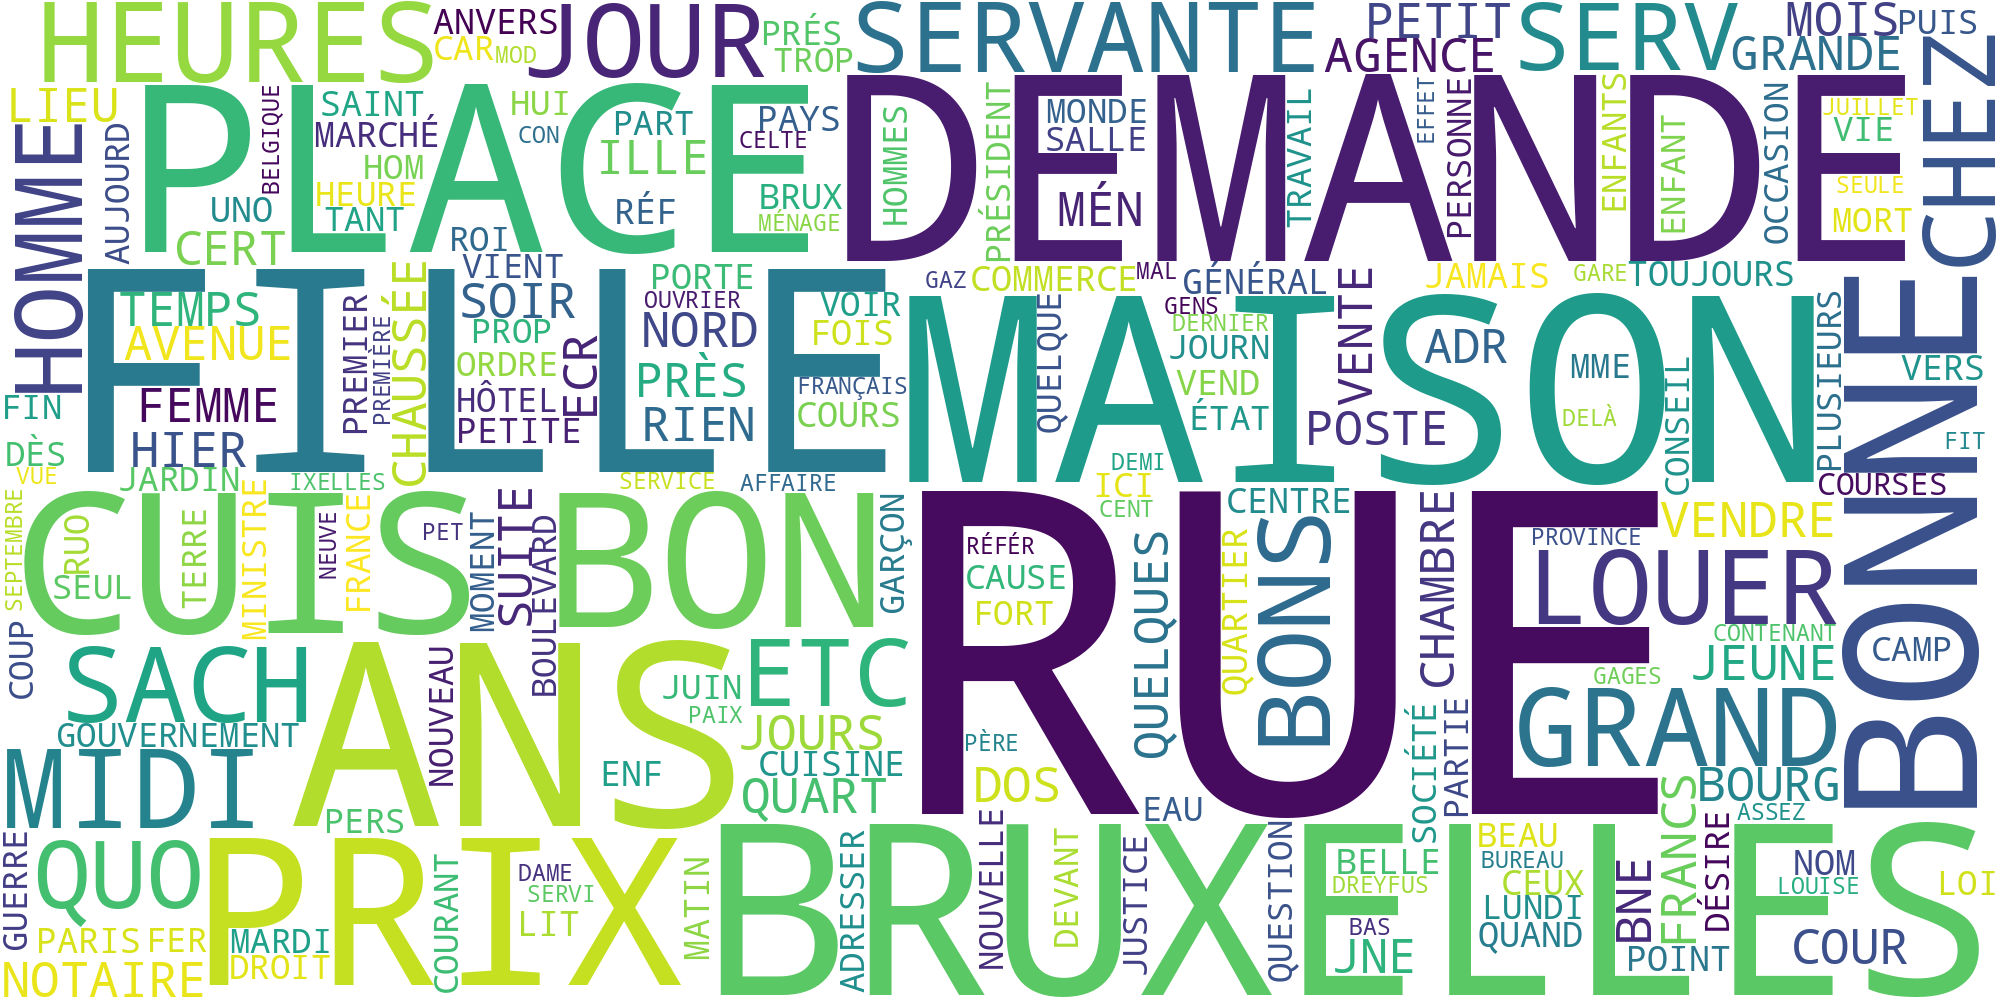

In [14]:
frequencies = Counter(after.split())

cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))